In [1]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)


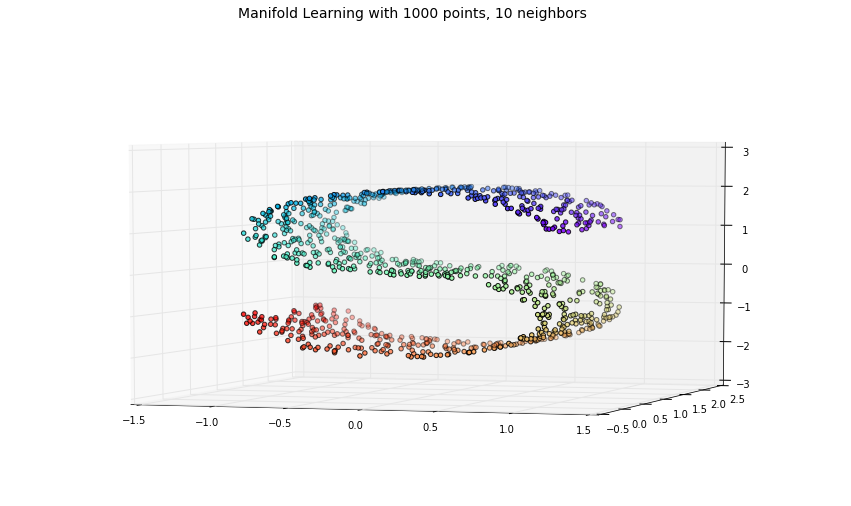

In [34]:
n_neighbors = 10
n_components = 2
%matplotlib inline

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='rainbow')
ax.view_init(4, -72)

MDS: 2.8 sec
t-SNE: 3.6 sec


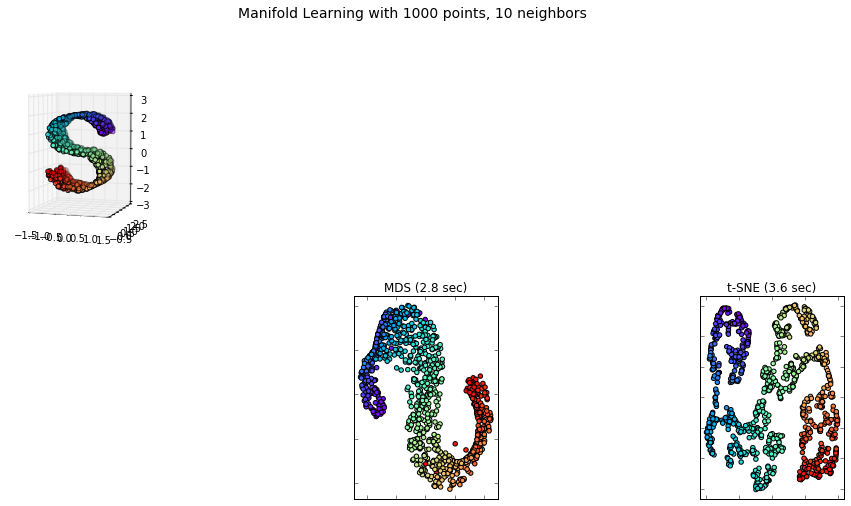

In [32]:
n_neighbors = 10
n_components = 2
%matplotlib inline

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.rainbow)
    
# t0 = time()
# Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
#                                     eigen_solver='auto',
#                                     method=method).fit_transform(X)
# t1 = time()
# print("%s: %.2g sec" % (methods[i], t1 - t0))

# ax = fig.add_subplot(252 + i)
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.rainbow)
# plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

# t0 = time()
# Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
# t1 = time()
# print("Isomap: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(257)
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.rainbow)
# plt.title("Isomap (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# t0 = time()
# se = manifold.SpectralEmbedding(n_components=n_components,
#                                 n_neighbors=n_neighbors)
# Y = se.fit_transform(X)
# t1 = time()
# print("SpectralEmbedding: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(259)
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.rainbow)
# plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()    